In [1]:
!pip install matplotlib

     |████████████████████████████████| 11.4 MB 128 kB/s eta 0:00:01    |█████████████████████▎          | 7.6 MB 5.8 MB/s eta 0:00:01
  Using cached importlib_resources-6.1.1-py3-none-any.whl (33 kB)
     |████████████████████████████████| 285 kB 15.7 MB/s eta 0:00:01
     |████████████████████████████████| 1.4 MB 11.5 MB/s eta 0:00:01
     |████████████████████████████████| 4.3 MB 12.5 MB/s eta 0:00:01
     |████████████████████████████████| 4.6 MB 9.5 MB/s eta 0:00:01


In [2]:
%matplotlib inline
import matplotlib
# matplotlib.use('TkAgg')
# from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import zmq
import os
import time
import sys
import json


Matplotlib is building the font cache; this may take a moment.


In [9]:
#initializing subscriber
host = '192.168.8.86'
port = 8358
url = 'tcp://'+host+':'+str(port)
context = zmq.Context()
socket = context.socket(zmq.SUB)
socket.connect(url)
socket.setsockopt(zmq.SUBSCRIBE, b'')

#samples to be collected 
numSamples = 500

In [14]:
def getSamples(numSamples, socket):
    count = 0
    magVals = np.zeros((numSamples,3))
    while count != numSamples:
        packet = socket.recv_json(0)
        magData = packet['data']
        magData = json.loads(magData)
        magVals[count,:] = np.array(magData)
        count = count + 1
        if (count%100 == 0 and count != 0 ):
            print ("Recieved {0} samples of mag data".format(count))
    return magVals

Recieved 100 samples of mag data
Recieved 200 samples of mag data
Recieved 300 samples of mag data
Recieved 400 samples of mag data
Recieved 500 samples of mag data


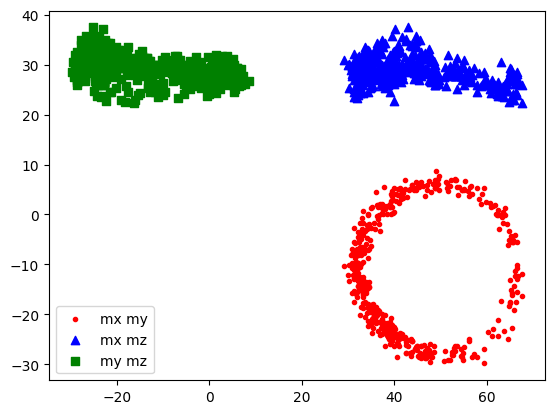

In [15]:
maguncalib = getSamples(numSamples, socket)
plt.scatter(maguncalib[:,0], maguncalib[:,1],color='red',label='mx my',marker='.')
plt.scatter(maguncalib[:,0], maguncalib[:,2],color='blue',label='mx mz',marker='^')
plt.scatter(maguncalib[:,1], maguncalib[:,2],color='green',label='my mz',marker='s')
plt.legend(loc='best')
plt.show()

In [16]:
maguncalib1 = maguncalib

Recieved 100 samples of mag data
Recieved 200 samples of mag data
Recieved 300 samples of mag data
Recieved 400 samples of mag data
Recieved 500 samples of mag data


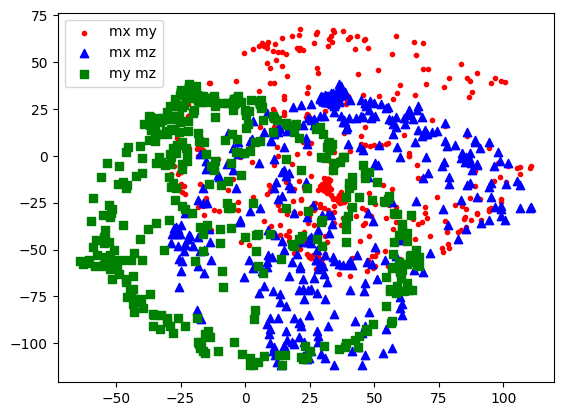

In [17]:
magcalib = getSamples(numSamples, socket)
plt.scatter(magcalib[:,0], magcalib[:,1],color='red',label='mx my',marker='.')
plt.scatter(magcalib[:,0], magcalib[:,2],color='blue',label='mx mz',marker='^')
plt.scatter(magcalib[:,1], magcalib[:,2],color='green',label='my mz',marker='s')
plt.legend(loc='best')
plt.show()